In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("Iris.csv")

Splitting the data into training and testing


In [2]:
training_data = data.sample(frac=0.9, random_state=25)
testing_data = data.drop(training_data.index)
m=0
c=0
m_reg=0
c_reg=0
wght_reg=[]
wght_noreg=[]

Defining fit and predict methods


In [3]:
def fit(X,Y,reg):
  n=len(X)
  weights=[]
  global m
  global c
  lmbda=0.4
  m=0
  c=0
  global m_reg
  global c_reg 
  m_reg=0
  c_reg=0
  learning_rate=0.01
  if(reg==False):
    i=0
    while i < 100:
      y_pred= m*X+c 
      cost=sum((Y-(m*X+c))**2)/len(X)
      D_m = (-2/n) * sum(X * (Y - y_pred))  
      D_c = (-2/n) * sum(Y - y_pred)  
      m = m - learning_rate * D_m  
      c = c - learning_rate * D_c
      i=i+1
      weights.append(D_m)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X, Y)
    ax.axline([0, c], slope=m, c='r')
  elif(reg==True):
    i=0
    while i < 100:
      y_pred_reg=m_reg*X+c_reg
      cost_reg=sum((Y-(m_reg*X+c_reg))**2)/len(X)+lmbda*(m_reg**2)
      D_m_reg=(-2/n)*sum(X * (Y - y_pred_reg))+2*lmbda*m_reg
      D_c_reg=(-2/n) * sum(Y - y_pred_reg)
      m_reg = m_reg - learning_rate * D_m_reg  
      c_reg = c_reg - learning_rate * D_c_reg
      i=i+1
      weights.append(D_m_reg)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X, Y)
    ax.axline([0, c_reg], slope=m_reg, c='r')
  return weights    

def predict(X,Y,reg):
    lmbda=0.4
    if reg==False:
      error=sum((Y-(m*X+c))**2)/len(X)
      return 100-(error*100)
    elif reg==True:
      error_reg=sum((Y-(m_reg*X+c_reg))**2)/len(X)+lmbda*(m_reg**2)
      return 100-(error_reg*100)  

     
    
    

Training and testing the model and predicting the **Petal width** using **Petal length** of **Setosa Species** **without Regularisation**


Accuracy of the model is 98.93330346378312


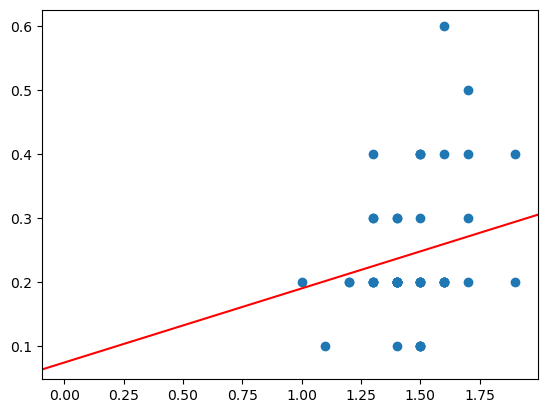

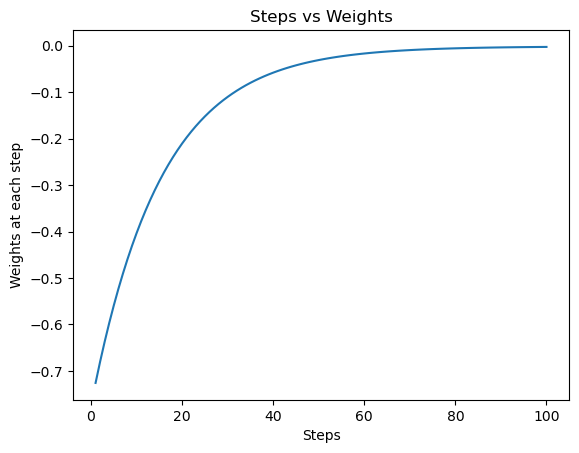

In [4]:

newdf = training_data[training_data.Species == "Iris-setosa"]
ydatapoints=fit(newdf['PetalLengthCm'],newdf['PetalWidthCm'],False)
global wght_reg 
wght_reg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-setosa"]
print("Accuracy of the model is",predict(newdf['PetalLengthCm'],newdf['PetalWidthCm'],False))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

Training and testing the model and predicting the **Petal width** using **Petal length** of **Setosa Species with Regularisation**

Accuracy of the model is 98.58661773596434


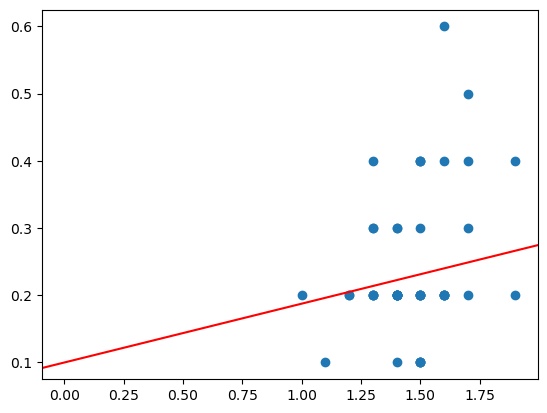

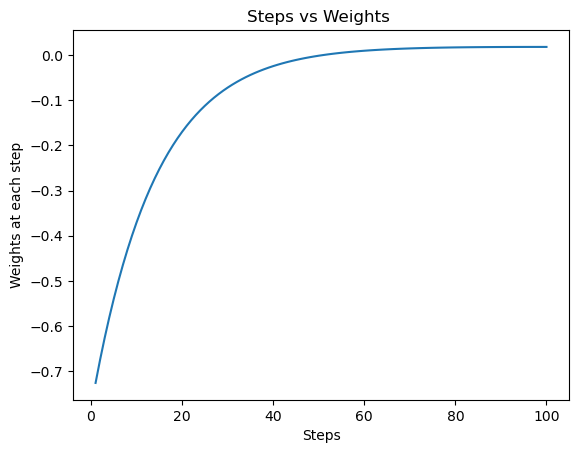

In [5]:
newdf = training_data[training_data.Species == "Iris-setosa"]

ydatapoints=fit(newdf['PetalLengthCm'],newdf['PetalWidthCm'],True)
global wght_noreg 
wght_noreg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-setosa"]
print("Accuracy of the model is",predict(newdf['PetalLengthCm'],newdf['PetalWidthCm'],True))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

In [6]:

i=0
st=""
while i<len(wght_reg):
  st+="Difference is "+str(wght_noreg[i]-wght_reg[i])+"\n"    
  i=i+1  

with open("Setosa1.txt", "w") as file1:
     file1.write(st)

Training and testing the model and predicting the **Sepal width** using **Sepal length** of **Setosa Species** **without Regularisation**

Accuracy of the model is 93.34442473274079


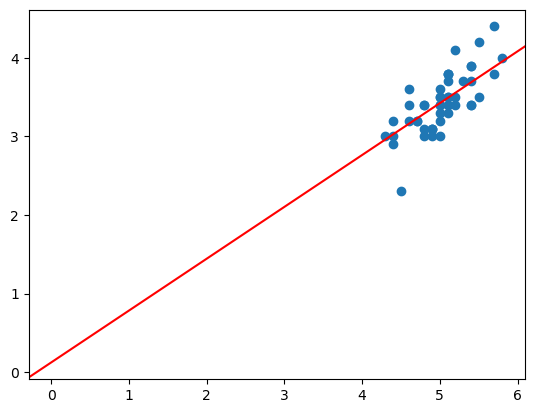

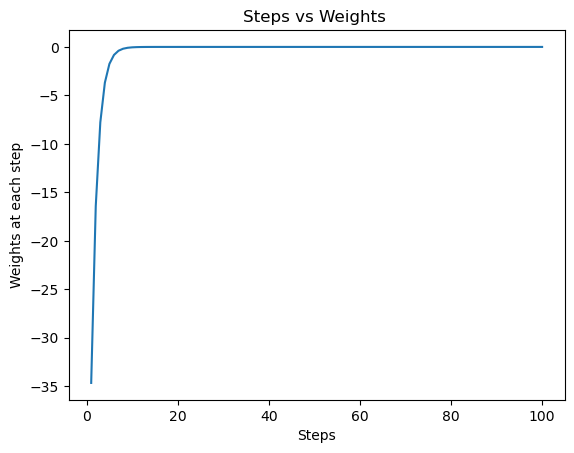

In [7]:
newdf = training_data[training_data.Species == "Iris-setosa"]
ydatapoints=fit(newdf['SepalLengthCm'],newdf['SepalWidthCm'],False)
global wght_reg 
wght_reg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-setosa"]
print("Accuracy of the model is",predict(newdf['SepalLengthCm'],newdf['SepalWidthCm'],False))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

Training and testing the model and predicting the **Sepal width** using **Sepal length** of **Setosa Species** **with Regularisation**

Accuracy of the model is 77.07348189964557


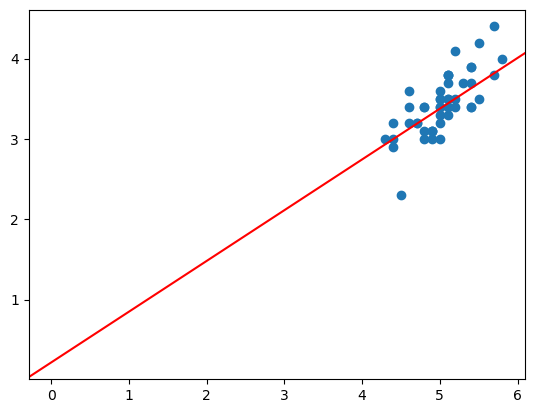

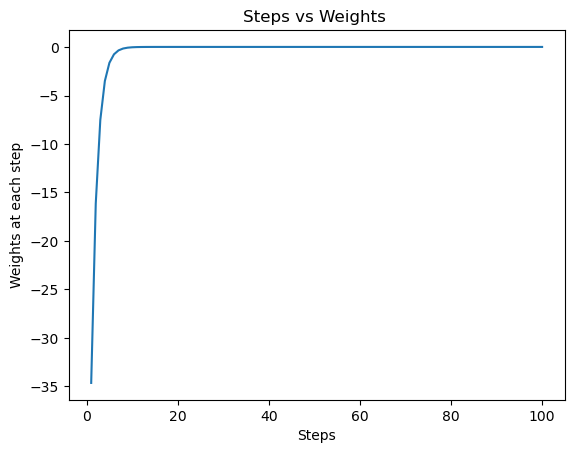

In [8]:
newdf = training_data[training_data.Species == "Iris-setosa"]
ydatapoints=fit(newdf['SepalLengthCm'],newdf['SepalWidthCm'],True)
global wght_noreg 
wght_noreg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-setosa"]
print("Accuracy of the model is",predict(newdf['SepalLengthCm'],newdf['SepalWidthCm'],True))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

In [9]:
i=0
st=""
while i<len(wght_reg):
  st+="Difference is "+str(wght_noreg[i]-wght_reg[i])+"\n"    
  i=i+1  

with open("Setosa2.txt", "w") as file1:
     file1.write(st)

Training and testing the model and predicting the **Petal length** using **Petal width** of **versicolor Species** **without Regularisation**

Accuracy of the model is 91.58682696829943


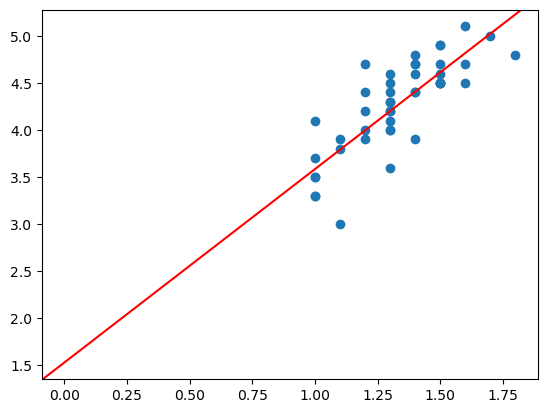

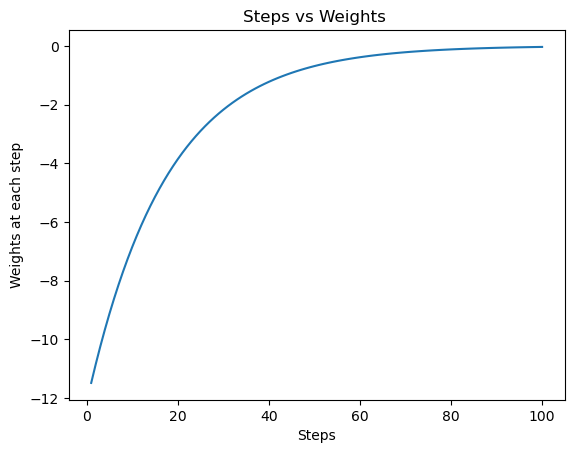

In [10]:

newdf = training_data[training_data.Species == "Iris-versicolor"]
ydatapoints=fit(newdf['PetalWidthCm'],newdf['PetalLengthCm'],False)
global wght_reg 
wght_reg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-versicolor"]
print("Accuracy of the model is",predict(newdf['PetalWidthCm'],newdf['PetalLengthCm'],False))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

Training and testing the model and predicting the **Petal length** using **Petal width** of **versicolor Species** **with Regularisation**


Accuracy of the model is -10.111248213254513


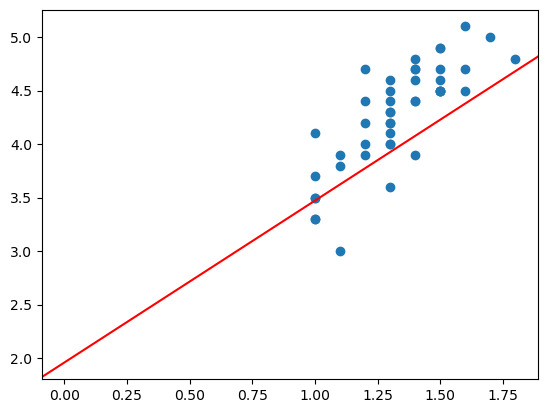

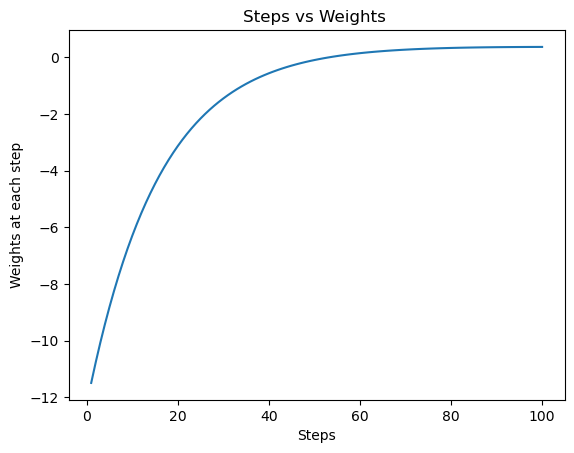

In [11]:
newdf = training_data[training_data.Species == "Iris-versicolor"]
ydatapoints=fit(newdf['PetalWidthCm'],newdf['PetalLengthCm'],True)
global wght_noreg 
wght_noreg=ydatapoints
global wght_reg 
wght_reg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-versicolor"]
print("Accuracy of the model is",predict(newdf['PetalWidthCm'],newdf['PetalLengthCm'],True))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

In [12]:
i=0
st=""
while i<len(wght_reg):
  st+="Difference is "+str(wght_noreg[i]-wght_reg[i])+"\n"    
  i=i+1  

with open("Versicolor1.txt", "w") as file1:
     file1.write(st)

Training and testing the model and predicting the **Sepal length** using **Sepal width** of **versicolor Species** **without Regularisation**


Accuracy of the model is 74.74273225811211


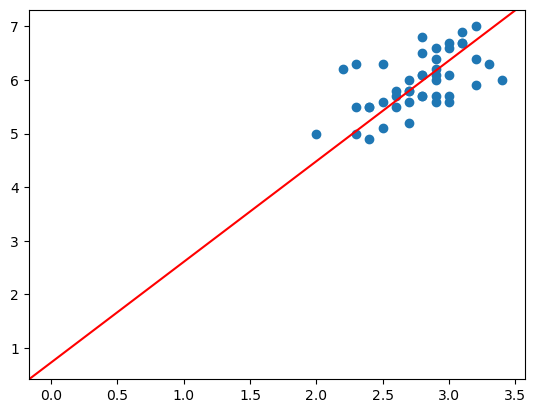

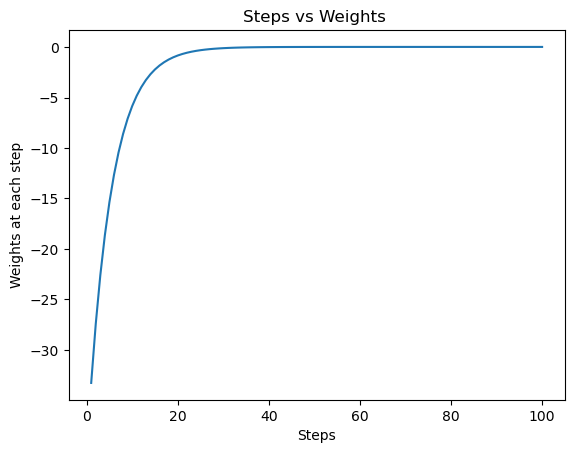

In [13]:
newdf = training_data[training_data.Species == "Iris-versicolor"]
ydatapoints=fit(newdf['SepalWidthCm'],newdf['SepalLengthCm'],False)
global wght_reg 
wght_reg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-versicolor"]
print("Accuracy of the model is",predict(newdf['SepalWidthCm'],newdf['SepalLengthCm'],False))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

Training and testing the model and predicting the **Sepal length** using **Sepal width** of **versicolor Species** **with Regularisation**

Accuracy of the model is -38.17717242032782


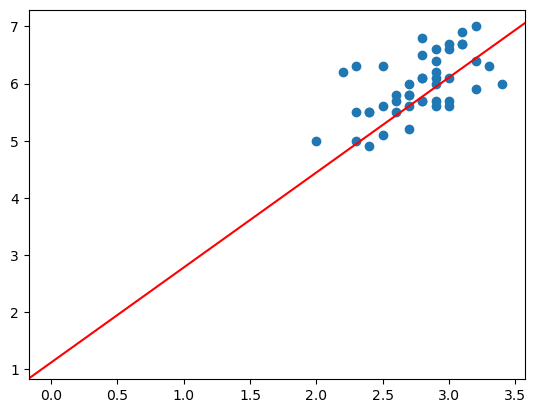

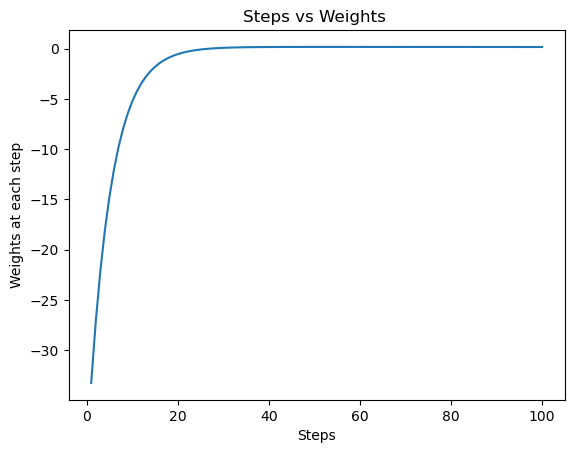

In [14]:
newdf = training_data[training_data.Species == "Iris-versicolor"]
ydatapoints=fit(newdf['SepalWidthCm'],newdf['SepalLengthCm'],True)
global wght_noreg 
wght_noreg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-versicolor"]
print("Accuracy of the model is",predict(newdf['SepalWidthCm'],newdf['SepalLengthCm'],True))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

In [15]:
i=0
st=""
while i<len(wght_reg):
  st+="Difference is "+str(wght_noreg[i]-wght_reg[i])+"\n"    
  i=i+1  

with open("Versicolor2.txt", "w") as file1:
     file1.write(st)

Training and testing the model and predicting the **Petal width** using **Petal length** of **virginica Species** **without Regularisation**

Accuracy of the model is 92.5399593930728


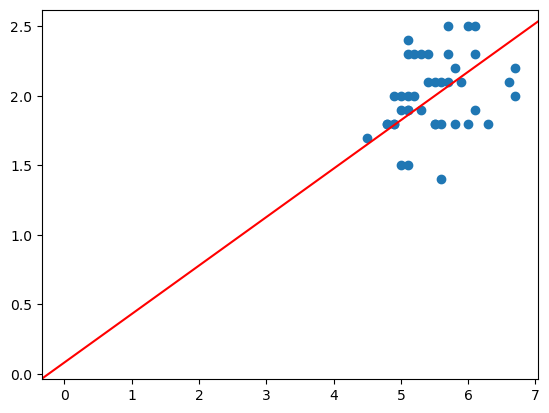

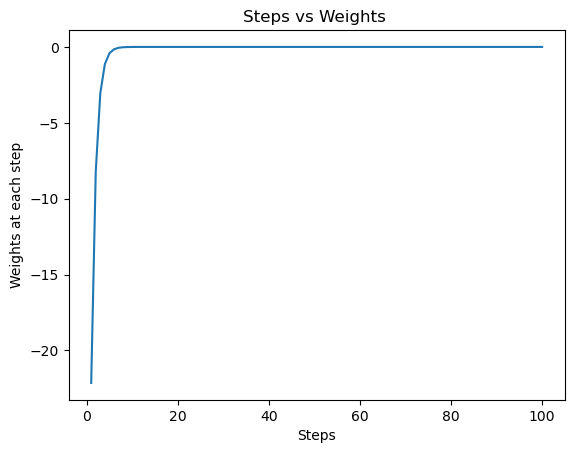

In [16]:
newdf = training_data[training_data.Species == "Iris-virginica"]
ydatapoints=fit(newdf['PetalLengthCm'],newdf['PetalWidthCm'],False)
global wght_reg 
wght_reg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-virginica"]
print("Accuracy of the model is",predict(newdf['PetalLengthCm'],newdf['PetalWidthCm'],False))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

Training and testing the model and predicting the **Petal width** using **Petal length** of **virginica Species** **with Regularisation**

Accuracy of the model is 88.05649503756625


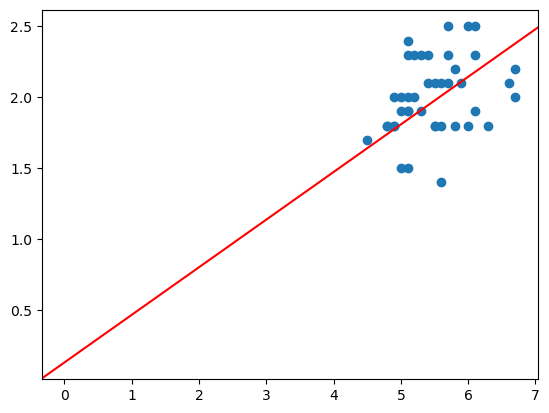

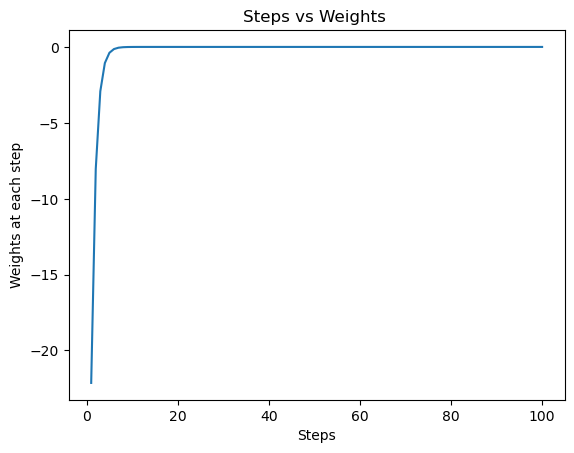

In [17]:
newdf = training_data[training_data.Species == "Iris-virginica"]
ydatapoints=fit(newdf['PetalLengthCm'],newdf['PetalWidthCm'],True)
global wght_noreg 
wght_noreg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-virginica"]
print("Accuracy of the model is",predict(newdf['PetalLengthCm'],newdf['PetalWidthCm'],True))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

In [18]:
i=0
st=""
while i<len(wght_reg):
  st+="Difference is "+str(wght_noreg[i]-wght_reg[i])+"\n"    
  i=i+1  

with open("Virginica.txt", "w") as file1:
     file1.write(st)

Training and testing the model and predicting the **Sepal width** using **Sepal length** of **virginica Species** **without Regularisation**

Accuracy of the model is 91.53045524042756


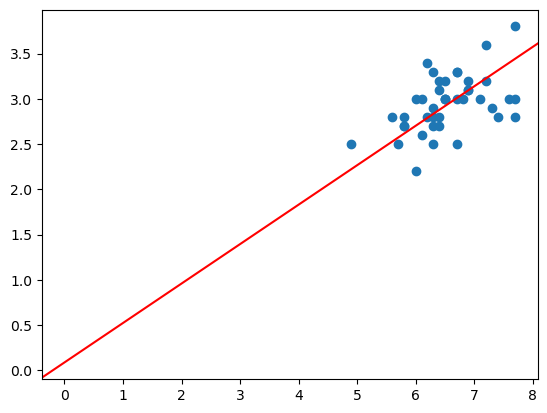

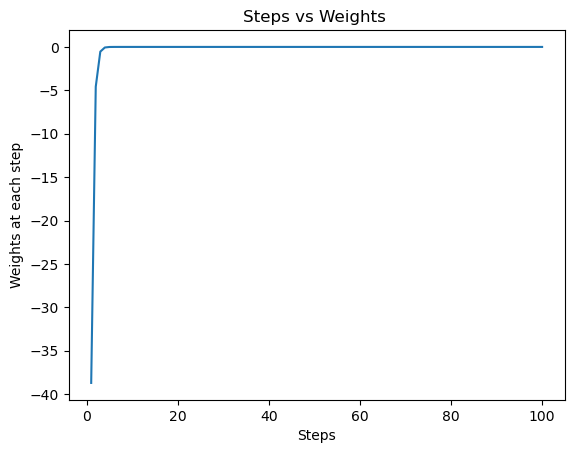

In [19]:
newdf = training_data[training_data.Species == "Iris-virginica"]
ydatapoints=fit(newdf['SepalLengthCm'],newdf['SepalWidthCm'],False)
global wght_reg 
wght_reg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-virginica"]
print("Accuracy of the model is",predict(newdf['SepalLengthCm'],newdf['SepalWidthCm'],False))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

Training and testing the model and predicting the **Sepal width** using **Sepal length** of **virginica Species** **with Regularisation**


Accuracy of the model is 84.36050568172755


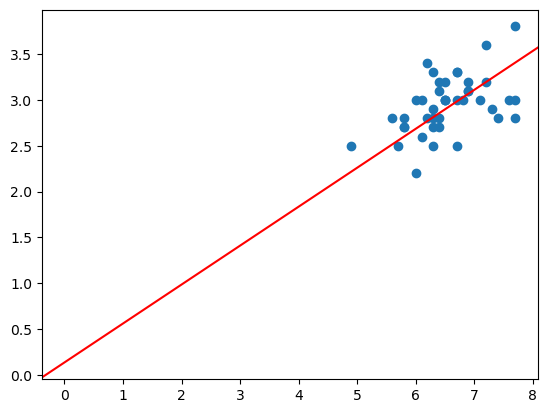

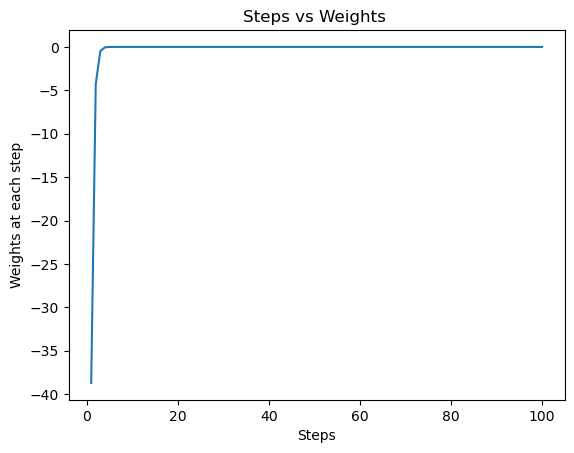

In [20]:
newdf = training_data[training_data.Species == "Iris-virginica"]
ydatapoints=fit(newdf['SepalLengthCm'],newdf['SepalWidthCm'],True)
global wght_noreg 
wght_noreg=ydatapoints
xdatapoints=[]
i=1
while i <=100:
  xdatapoints.append(i)
  i=i+1
newdf_test = testing_data[testing_data.Species == "Iris-virginica"]
print("Accuracy of the model is",predict(newdf['SepalLengthCm'],newdf['SepalWidthCm'],True))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Steps vs Weights ")
plt.xlabel("Steps")
plt.ylabel("Weights at each step")
plt.plot(xdatapoints,ydatapoints)
plt.show()

In [21]:
i=0
st=""
while i<len(wght_reg):
  st+="Difference is "+str(wght_noreg[i]-wght_reg[i])+"\n"    
  i=i+1  

with open("Virginica2.txt", "w") as file1:
     file1.write(st)